<div class="alert alert-block alert-info">

# **LoadComicData_rgb.ipynb**
***
### **This script loads comic book images for RGB neural network training. The images are made in a pair of one colored, and one grayscaled.**


In [9]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Loads API-key

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '..\API Key here'

### Download the dataset - **Warning it's 2 GB**

In [ ]:
print("Downloading dataset from Kaggle...")
!kaggle datasets download -d cenkbircanoglu/comic-books-classification -p comic_dataset --unzip

### Process images into grayscale and colored pairs and splitting some proportion of the data into training data and test data. 

In [10]:
from sklearn.model_selection import train_test_split

input_images = []
output_images = []

image_paths = glob.glob('comic_dataset/**/*.jpg', recursive=True)
print(f"Found {len(image_paths)} images.")

for path in tqdm(image_paths[:2000]):  # Ajustiable limit of how many image the model loads
    bgr_img = cv2.imread(path)
    if bgr_img is None:
        continue
    bgr_img = cv2.resize(bgr_img, (256, 256))
    
    # Convert BGR to RGB
    color_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)


    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    gray_img = np.expand_dims(gray_img, axis=-1)

    color_img = (color_img / 255.0).astype(np.float32)
    gray_img = (gray_img / 255.0).astype(np.float32)

    # Normalize for tanh activation output
    color_img = (color_img - 0.5) * 2.0
    gray_img = (gray_img - 0.5) * 2.0       

    input_images.append(gray_img)
    output_images.append(color_img)

    x = np.array(input_images)
    y = np.array(output_images)


    print(f"Input shape: {x.shape}, Output shape: {y.shape}")

# Split to avoid testing on same data the model is trained on. 20% (0.2) goes to testing  
x_train, x_test, y_train, y_test = train_test_split(
    input_images, output_images, test_size=0.2, random_state=42)

Found 320 images.


  7%|▋         | 23/320 [00:00<00:01, 211.58it/s]

Input shape: (1, 256, 256, 1), Output shape: (1, 256, 256, 3)
Input shape: (2, 256, 256, 1), Output shape: (2, 256, 256, 3)
Input shape: (3, 256, 256, 1), Output shape: (3, 256, 256, 3)
Input shape: (4, 256, 256, 1), Output shape: (4, 256, 256, 3)
Input shape: (5, 256, 256, 1), Output shape: (5, 256, 256, 3)
Input shape: (6, 256, 256, 1), Output shape: (6, 256, 256, 3)
Input shape: (7, 256, 256, 1), Output shape: (7, 256, 256, 3)
Input shape: (8, 256, 256, 1), Output shape: (8, 256, 256, 3)
Input shape: (9, 256, 256, 1), Output shape: (9, 256, 256, 3)
Input shape: (10, 256, 256, 1), Output shape: (10, 256, 256, 3)
Input shape: (11, 256, 256, 1), Output shape: (11, 256, 256, 3)
Input shape: (12, 256, 256, 1), Output shape: (12, 256, 256, 3)
Input shape: (13, 256, 256, 1), Output shape: (13, 256, 256, 3)
Input shape: (14, 256, 256, 1), Output shape: (14, 256, 256, 3)
Input shape: (15, 256, 256, 1), Output shape: (15, 256, 256, 3)
Input shape: (16, 256, 256, 1), Output shape: (16, 256, 25

 14%|█▍        | 45/320 [00:00<00:02, 137.29it/s]

Input shape: (35, 256, 256, 1), Output shape: (35, 256, 256, 3)
Input shape: (36, 256, 256, 1), Output shape: (36, 256, 256, 3)
Input shape: (37, 256, 256, 1), Output shape: (37, 256, 256, 3)
Input shape: (38, 256, 256, 1), Output shape: (38, 256, 256, 3)
Input shape: (39, 256, 256, 1), Output shape: (39, 256, 256, 3)
Input shape: (40, 256, 256, 1), Output shape: (40, 256, 256, 3)
Input shape: (41, 256, 256, 1), Output shape: (41, 256, 256, 3)
Input shape: (42, 256, 256, 1), Output shape: (42, 256, 256, 3)
Input shape: (43, 256, 256, 1), Output shape: (43, 256, 256, 3)
Input shape: (44, 256, 256, 1), Output shape: (44, 256, 256, 3)
Input shape: (45, 256, 256, 1), Output shape: (45, 256, 256, 3)
Input shape: (46, 256, 256, 1), Output shape: (46, 256, 256, 3)
Input shape: (47, 256, 256, 1), Output shape: (47, 256, 256, 3)
Input shape: (48, 256, 256, 1), Output shape: (48, 256, 256, 3)
Input shape: (49, 256, 256, 1), Output shape: (49, 256, 256, 3)
Input shape: (50, 256, 256, 1), Output s

 19%|█▉        | 61/320 [00:00<00:02, 99.33it/s] 

Input shape: (53, 256, 256, 1), Output shape: (53, 256, 256, 3)
Input shape: (54, 256, 256, 1), Output shape: (54, 256, 256, 3)
Input shape: (55, 256, 256, 1), Output shape: (55, 256, 256, 3)
Input shape: (56, 256, 256, 1), Output shape: (56, 256, 256, 3)
Input shape: (57, 256, 256, 1), Output shape: (57, 256, 256, 3)
Input shape: (58, 256, 256, 1), Output shape: (58, 256, 256, 3)
Input shape: (59, 256, 256, 1), Output shape: (59, 256, 256, 3)
Input shape: (60, 256, 256, 1), Output shape: (60, 256, 256, 3)
Input shape: (61, 256, 256, 1), Output shape: (61, 256, 256, 3)
Input shape: (62, 256, 256, 1), Output shape: (62, 256, 256, 3)
Input shape: (63, 256, 256, 1), Output shape: (63, 256, 256, 3)
Input shape: (64, 256, 256, 1), Output shape: (64, 256, 256, 3)
Input shape: (65, 256, 256, 1), Output shape: (65, 256, 256, 3)


 23%|██▎       | 73/320 [00:00<00:02, 84.18it/s]

Input shape: (66, 256, 256, 1), Output shape: (66, 256, 256, 3)
Input shape: (67, 256, 256, 1), Output shape: (67, 256, 256, 3)
Input shape: (68, 256, 256, 1), Output shape: (68, 256, 256, 3)
Input shape: (69, 256, 256, 1), Output shape: (69, 256, 256, 3)
Input shape: (70, 256, 256, 1), Output shape: (70, 256, 256, 3)
Input shape: (71, 256, 256, 1), Output shape: (71, 256, 256, 3)
Input shape: (72, 256, 256, 1), Output shape: (72, 256, 256, 3)
Input shape: (73, 256, 256, 1), Output shape: (73, 256, 256, 3)
Input shape: (74, 256, 256, 1), Output shape: (74, 256, 256, 3)
Input shape: (75, 256, 256, 1), Output shape: (75, 256, 256, 3)
Input shape: (76, 256, 256, 1), Output shape: (76, 256, 256, 3)


 26%|██▌       | 83/320 [00:00<00:03, 70.22it/s]

Input shape: (77, 256, 256, 1), Output shape: (77, 256, 256, 3)
Input shape: (78, 256, 256, 1), Output shape: (78, 256, 256, 3)
Input shape: (79, 256, 256, 1), Output shape: (79, 256, 256, 3)
Input shape: (80, 256, 256, 1), Output shape: (80, 256, 256, 3)
Input shape: (81, 256, 256, 1), Output shape: (81, 256, 256, 3)
Input shape: (82, 256, 256, 1), Output shape: (82, 256, 256, 3)
Input shape: (83, 256, 256, 1), Output shape: (83, 256, 256, 3)
Input shape: (84, 256, 256, 1), Output shape: (84, 256, 256, 3)
Input shape: (85, 256, 256, 1), Output shape: (85, 256, 256, 3)
Input shape: (86, 256, 256, 1), Output shape: (86, 256, 256, 3)


 28%|██▊       | 91/320 [00:01<00:03, 60.93it/s]

Input shape: (87, 256, 256, 1), Output shape: (87, 256, 256, 3)
Input shape: (88, 256, 256, 1), Output shape: (88, 256, 256, 3)
Input shape: (89, 256, 256, 1), Output shape: (89, 256, 256, 3)
Input shape: (90, 256, 256, 1), Output shape: (90, 256, 256, 3)
Input shape: (91, 256, 256, 1), Output shape: (91, 256, 256, 3)
Input shape: (92, 256, 256, 1), Output shape: (92, 256, 256, 3)
Input shape: (93, 256, 256, 1), Output shape: (93, 256, 256, 3)
Input shape: (94, 256, 256, 1), Output shape: (94, 256, 256, 3)
Input shape: (95, 256, 256, 1), Output shape: (95, 256, 256, 3)


 31%|███       | 98/320 [00:01<00:03, 56.99it/s]

Input shape: (96, 256, 256, 1), Output shape: (96, 256, 256, 3)
Input shape: (97, 256, 256, 1), Output shape: (97, 256, 256, 3)
Input shape: (98, 256, 256, 1), Output shape: (98, 256, 256, 3)
Input shape: (99, 256, 256, 1), Output shape: (99, 256, 256, 3)
Input shape: (100, 256, 256, 1), Output shape: (100, 256, 256, 3)
Input shape: (101, 256, 256, 1), Output shape: (101, 256, 256, 3)
Input shape: (102, 256, 256, 1), Output shape: (102, 256, 256, 3)
Input shape: (103, 256, 256, 1), Output shape: (103, 256, 256, 3)
Input shape: (104, 256, 256, 1), Output shape: (104, 256, 256, 3)


 34%|███▍      | 110/320 [00:01<00:04, 46.92it/s]

Input shape: (105, 256, 256, 1), Output shape: (105, 256, 256, 3)
Input shape: (106, 256, 256, 1), Output shape: (106, 256, 256, 3)
Input shape: (107, 256, 256, 1), Output shape: (107, 256, 256, 3)
Input shape: (108, 256, 256, 1), Output shape: (108, 256, 256, 3)
Input shape: (109, 256, 256, 1), Output shape: (109, 256, 256, 3)
Input shape: (110, 256, 256, 1), Output shape: (110, 256, 256, 3)
Input shape: (111, 256, 256, 1), Output shape: (111, 256, 256, 3)
Input shape: (112, 256, 256, 1), Output shape: (112, 256, 256, 3)


 36%|███▌      | 115/320 [00:01<00:04, 43.83it/s]

Input shape: (113, 256, 256, 1), Output shape: (113, 256, 256, 3)
Input shape: (114, 256, 256, 1), Output shape: (114, 256, 256, 3)
Input shape: (115, 256, 256, 1), Output shape: (115, 256, 256, 3)
Input shape: (116, 256, 256, 1), Output shape: (116, 256, 256, 3)
Input shape: (117, 256, 256, 1), Output shape: (117, 256, 256, 3)
Input shape: (118, 256, 256, 1), Output shape: (118, 256, 256, 3)
Input shape: (119, 256, 256, 1), Output shape: (119, 256, 256, 3)
Input shape: (120, 256, 256, 1), Output shape: (120, 256, 256, 3)


 39%|███▉      | 125/320 [00:02<00:05, 38.69it/s]

Input shape: (121, 256, 256, 1), Output shape: (121, 256, 256, 3)
Input shape: (122, 256, 256, 1), Output shape: (122, 256, 256, 3)
Input shape: (123, 256, 256, 1), Output shape: (123, 256, 256, 3)
Input shape: (124, 256, 256, 1), Output shape: (124, 256, 256, 3)
Input shape: (125, 256, 256, 1), Output shape: (125, 256, 256, 3)
Input shape: (126, 256, 256, 1), Output shape: (126, 256, 256, 3)
Input shape: (127, 256, 256, 1), Output shape: (127, 256, 256, 3)


 42%|████▏     | 133/320 [00:02<00:05, 35.88it/s]

Input shape: (128, 256, 256, 1), Output shape: (128, 256, 256, 3)
Input shape: (129, 256, 256, 1), Output shape: (129, 256, 256, 3)
Input shape: (130, 256, 256, 1), Output shape: (130, 256, 256, 3)
Input shape: (131, 256, 256, 1), Output shape: (131, 256, 256, 3)
Input shape: (132, 256, 256, 1), Output shape: (132, 256, 256, 3)
Input shape: (133, 256, 256, 1), Output shape: (133, 256, 256, 3)
Input shape: (134, 256, 256, 1), Output shape: (134, 256, 256, 3)


 43%|████▎     | 137/320 [00:02<00:05, 34.47it/s]

Input shape: (135, 256, 256, 1), Output shape: (135, 256, 256, 3)
Input shape: (136, 256, 256, 1), Output shape: (136, 256, 256, 3)
Input shape: (137, 256, 256, 1), Output shape: (137, 256, 256, 3)
Input shape: (138, 256, 256, 1), Output shape: (138, 256, 256, 3)
Input shape: (139, 256, 256, 1), Output shape: (139, 256, 256, 3)
Input shape: (140, 256, 256, 1), Output shape: (140, 256, 256, 3)
Input shape: (141, 256, 256, 1), Output shape: (141, 256, 256, 3)


 45%|████▌     | 145/320 [00:02<00:05, 30.22it/s]

Input shape: (142, 256, 256, 1), Output shape: (142, 256, 256, 3)
Input shape: (143, 256, 256, 1), Output shape: (143, 256, 256, 3)
Input shape: (144, 256, 256, 1), Output shape: (144, 256, 256, 3)
Input shape: (145, 256, 256, 1), Output shape: (145, 256, 256, 3)
Input shape: (146, 256, 256, 1), Output shape: (146, 256, 256, 3)
Input shape: (147, 256, 256, 1), Output shape: (147, 256, 256, 3)


 47%|████▋     | 149/320 [00:02<00:05, 28.85it/s]

Input shape: (148, 256, 256, 1), Output shape: (148, 256, 256, 3)
Input shape: (149, 256, 256, 1), Output shape: (149, 256, 256, 3)
Input shape: (150, 256, 256, 1), Output shape: (150, 256, 256, 3)
Input shape: (151, 256, 256, 1), Output shape: (151, 256, 256, 3)
Input shape: (152, 256, 256, 1), Output shape: (152, 256, 256, 3)


 48%|████▊     | 155/320 [00:03<00:06, 27.30it/s]

Input shape: (153, 256, 256, 1), Output shape: (153, 256, 256, 3)
Input shape: (154, 256, 256, 1), Output shape: (154, 256, 256, 3)
Input shape: (155, 256, 256, 1), Output shape: (155, 256, 256, 3)
Input shape: (156, 256, 256, 1), Output shape: (156, 256, 256, 3)
Input shape: (157, 256, 256, 1), Output shape: (157, 256, 256, 3)


 50%|█████     | 161/320 [00:03<00:06, 26.41it/s]

Input shape: (158, 256, 256, 1), Output shape: (158, 256, 256, 3)
Input shape: (159, 256, 256, 1), Output shape: (159, 256, 256, 3)
Input shape: (160, 256, 256, 1), Output shape: (160, 256, 256, 3)
Input shape: (161, 256, 256, 1), Output shape: (161, 256, 256, 3)
Input shape: (162, 256, 256, 1), Output shape: (162, 256, 256, 3)
Input shape: (163, 256, 256, 1), Output shape: (163, 256, 256, 3)


 52%|█████▏    | 167/320 [00:03<00:05, 26.53it/s]

Input shape: (164, 256, 256, 1), Output shape: (164, 256, 256, 3)
Input shape: (165, 256, 256, 1), Output shape: (165, 256, 256, 3)
Input shape: (166, 256, 256, 1), Output shape: (166, 256, 256, 3)
Input shape: (167, 256, 256, 1), Output shape: (167, 256, 256, 3)
Input shape: (168, 256, 256, 1), Output shape: (168, 256, 256, 3)
Input shape: (169, 256, 256, 1), Output shape: (169, 256, 256, 3)


 54%|█████▍    | 173/320 [00:03<00:05, 25.41it/s]

Input shape: (170, 256, 256, 1), Output shape: (170, 256, 256, 3)
Input shape: (171, 256, 256, 1), Output shape: (171, 256, 256, 3)
Input shape: (172, 256, 256, 1), Output shape: (172, 256, 256, 3)
Input shape: (173, 256, 256, 1), Output shape: (173, 256, 256, 3)
Input shape: (174, 256, 256, 1), Output shape: (174, 256, 256, 3)
Input shape: (175, 256, 256, 1), Output shape: (175, 256, 256, 3)


 56%|█████▌    | 179/320 [00:04<00:05, 23.98it/s]

Input shape: (176, 256, 256, 1), Output shape: (176, 256, 256, 3)
Input shape: (177, 256, 256, 1), Output shape: (177, 256, 256, 3)
Input shape: (178, 256, 256, 1), Output shape: (178, 256, 256, 3)
Input shape: (179, 256, 256, 1), Output shape: (179, 256, 256, 3)
Input shape: (180, 256, 256, 1), Output shape: (180, 256, 256, 3)
Input shape: (181, 256, 256, 1), Output shape: (181, 256, 256, 3)


 58%|█████▊    | 185/320 [00:04<00:05, 24.03it/s]

Input shape: (182, 256, 256, 1), Output shape: (182, 256, 256, 3)
Input shape: (183, 256, 256, 1), Output shape: (183, 256, 256, 3)
Input shape: (184, 256, 256, 1), Output shape: (184, 256, 256, 3)
Input shape: (185, 256, 256, 1), Output shape: (185, 256, 256, 3)
Input shape: (186, 256, 256, 1), Output shape: (186, 256, 256, 3)


 60%|█████▉    | 191/320 [00:04<00:05, 22.40it/s]

Input shape: (187, 256, 256, 1), Output shape: (187, 256, 256, 3)
Input shape: (188, 256, 256, 1), Output shape: (188, 256, 256, 3)
Input shape: (189, 256, 256, 1), Output shape: (189, 256, 256, 3)
Input shape: (190, 256, 256, 1), Output shape: (190, 256, 256, 3)
Input shape: (191, 256, 256, 1), Output shape: (191, 256, 256, 3)


 61%|██████    | 194/320 [00:04<00:05, 22.07it/s]

Input shape: (192, 256, 256, 1), Output shape: (192, 256, 256, 3)
Input shape: (193, 256, 256, 1), Output shape: (193, 256, 256, 3)
Input shape: (194, 256, 256, 1), Output shape: (194, 256, 256, 3)
Input shape: (195, 256, 256, 1), Output shape: (195, 256, 256, 3)
Input shape: (196, 256, 256, 1), Output shape: (196, 256, 256, 3)


 62%|██████▎   | 200/320 [00:05<00:05, 20.87it/s]

Input shape: (197, 256, 256, 1), Output shape: (197, 256, 256, 3)
Input shape: (198, 256, 256, 1), Output shape: (198, 256, 256, 3)
Input shape: (199, 256, 256, 1), Output shape: (199, 256, 256, 3)
Input shape: (200, 256, 256, 1), Output shape: (200, 256, 256, 3)
Input shape: (201, 256, 256, 1), Output shape: (201, 256, 256, 3)


 63%|██████▎   | 203/320 [00:05<00:05, 20.70it/s]

Input shape: (202, 256, 256, 1), Output shape: (202, 256, 256, 3)
Input shape: (203, 256, 256, 1), Output shape: (203, 256, 256, 3)
Input shape: (204, 256, 256, 1), Output shape: (204, 256, 256, 3)
Input shape: (205, 256, 256, 1), Output shape: (205, 256, 256, 3)
Input shape: (206, 256, 256, 1), Output shape: (206, 256, 256, 3)


 65%|██████▌   | 209/320 [00:05<00:05, 21.18it/s]

Input shape: (207, 256, 256, 1), Output shape: (207, 256, 256, 3)
Input shape: (208, 256, 256, 1), Output shape: (208, 256, 256, 3)
Input shape: (209, 256, 256, 1), Output shape: (209, 256, 256, 3)
Input shape: (210, 256, 256, 1), Output shape: (210, 256, 256, 3)
Input shape: (211, 256, 256, 1), Output shape: (211, 256, 256, 3)


 67%|██████▋   | 215/320 [00:05<00:05, 20.14it/s]

Input shape: (212, 256, 256, 1), Output shape: (212, 256, 256, 3)
Input shape: (213, 256, 256, 1), Output shape: (213, 256, 256, 3)
Input shape: (214, 256, 256, 1), Output shape: (214, 256, 256, 3)
Input shape: (215, 256, 256, 1), Output shape: (215, 256, 256, 3)
Input shape: (216, 256, 256, 1), Output shape: (216, 256, 256, 3)


 68%|██████▊   | 218/320 [00:05<00:05, 19.75it/s]

Input shape: (217, 256, 256, 1), Output shape: (217, 256, 256, 3)
Input shape: (218, 256, 256, 1), Output shape: (218, 256, 256, 3)
Input shape: (219, 256, 256, 1), Output shape: (219, 256, 256, 3)
Input shape: (220, 256, 256, 1), Output shape: (220, 256, 256, 3)
Input shape: (221, 256, 256, 1), Output shape: (221, 256, 256, 3)


 70%|███████   | 225/320 [00:06<00:04, 19.39it/s]

Input shape: (222, 256, 256, 1), Output shape: (222, 256, 256, 3)
Input shape: (223, 256, 256, 1), Output shape: (223, 256, 256, 3)
Input shape: (224, 256, 256, 1), Output shape: (224, 256, 256, 3)
Input shape: (225, 256, 256, 1), Output shape: (225, 256, 256, 3)


 72%|███████▏  | 229/320 [00:06<00:04, 18.57it/s]

Input shape: (226, 256, 256, 1), Output shape: (226, 256, 256, 3)
Input shape: (227, 256, 256, 1), Output shape: (227, 256, 256, 3)
Input shape: (228, 256, 256, 1), Output shape: (228, 256, 256, 3)
Input shape: (229, 256, 256, 1), Output shape: (229, 256, 256, 3)


 72%|███████▏  | 231/320 [00:06<00:04, 18.14it/s]

Input shape: (230, 256, 256, 1), Output shape: (230, 256, 256, 3)
Input shape: (231, 256, 256, 1), Output shape: (231, 256, 256, 3)
Input shape: (232, 256, 256, 1), Output shape: (232, 256, 256, 3)
Input shape: (233, 256, 256, 1), Output shape: (233, 256, 256, 3)


 74%|███████▍  | 237/320 [00:07<00:04, 16.64it/s]

Input shape: (234, 256, 256, 1), Output shape: (234, 256, 256, 3)
Input shape: (235, 256, 256, 1), Output shape: (235, 256, 256, 3)
Input shape: (236, 256, 256, 1), Output shape: (236, 256, 256, 3)
Input shape: (237, 256, 256, 1), Output shape: (237, 256, 256, 3)


 75%|███████▌  | 241/320 [00:07<00:04, 17.49it/s]

Input shape: (238, 256, 256, 1), Output shape: (238, 256, 256, 3)
Input shape: (239, 256, 256, 1), Output shape: (239, 256, 256, 3)
Input shape: (240, 256, 256, 1), Output shape: (240, 256, 256, 3)
Input shape: (241, 256, 256, 1), Output shape: (241, 256, 256, 3)


 76%|███████▌  | 243/320 [00:07<00:04, 16.54it/s]

Input shape: (242, 256, 256, 1), Output shape: (242, 256, 256, 3)
Input shape: (243, 256, 256, 1), Output shape: (243, 256, 256, 3)
Input shape: (244, 256, 256, 1), Output shape: (244, 256, 256, 3)
Input shape: (245, 256, 256, 1), Output shape: (245, 256, 256, 3)


 77%|███████▋  | 247/320 [00:07<00:04, 16.21it/s]

Input shape: (246, 256, 256, 1), Output shape: (246, 256, 256, 3)
Input shape: (247, 256, 256, 1), Output shape: (247, 256, 256, 3)
Input shape: (248, 256, 256, 1), Output shape: (248, 256, 256, 3)
Input shape: (249, 256, 256, 1), Output shape: (249, 256, 256, 3)


 78%|███████▊  | 251/320 [00:07<00:04, 15.88it/s]

Input shape: (250, 256, 256, 1), Output shape: (250, 256, 256, 3)
Input shape: (251, 256, 256, 1), Output shape: (251, 256, 256, 3)
Input shape: (252, 256, 256, 1), Output shape: (252, 256, 256, 3)
Input shape: (253, 256, 256, 1), Output shape: (253, 256, 256, 3)


 80%|███████▉  | 255/320 [00:08<00:04, 15.89it/s]

Input shape: (254, 256, 256, 1), Output shape: (254, 256, 256, 3)
Input shape: (255, 256, 256, 1), Output shape: (255, 256, 256, 3)
Input shape: (256, 256, 256, 1), Output shape: (256, 256, 256, 3)
Input shape: (257, 256, 256, 1), Output shape: (257, 256, 256, 3)


 81%|████████  | 259/320 [00:08<00:03, 15.81it/s]

Input shape: (258, 256, 256, 1), Output shape: (258, 256, 256, 3)
Input shape: (259, 256, 256, 1), Output shape: (259, 256, 256, 3)
Input shape: (260, 256, 256, 1), Output shape: (260, 256, 256, 3)
Input shape: (261, 256, 256, 1), Output shape: (261, 256, 256, 3)


 82%|████████▏ | 263/320 [00:08<00:03, 15.80it/s]

Input shape: (262, 256, 256, 1), Output shape: (262, 256, 256, 3)
Input shape: (263, 256, 256, 1), Output shape: (263, 256, 256, 3)
Input shape: (264, 256, 256, 1), Output shape: (264, 256, 256, 3)
Input shape: (265, 256, 256, 1), Output shape: (265, 256, 256, 3)


 83%|████████▎ | 267/320 [00:08<00:03, 15.92it/s]

Input shape: (266, 256, 256, 1), Output shape: (266, 256, 256, 3)
Input shape: (267, 256, 256, 1), Output shape: (267, 256, 256, 3)
Input shape: (268, 256, 256, 1), Output shape: (268, 256, 256, 3)
Input shape: (269, 256, 256, 1), Output shape: (269, 256, 256, 3)


 85%|████████▍ | 271/320 [00:09<00:03, 14.66it/s]

Input shape: (270, 256, 256, 1), Output shape: (270, 256, 256, 3)
Input shape: (271, 256, 256, 1), Output shape: (271, 256, 256, 3)
Input shape: (272, 256, 256, 1), Output shape: (272, 256, 256, 3)


 86%|████████▌ | 275/320 [00:09<00:03, 14.37it/s]

Input shape: (273, 256, 256, 1), Output shape: (273, 256, 256, 3)
Input shape: (274, 256, 256, 1), Output shape: (274, 256, 256, 3)
Input shape: (275, 256, 256, 1), Output shape: (275, 256, 256, 3)


 87%|████████▋ | 277/320 [00:09<00:02, 14.44it/s]

Input shape: (276, 256, 256, 1), Output shape: (276, 256, 256, 3)
Input shape: (277, 256, 256, 1), Output shape: (277, 256, 256, 3)
Input shape: (278, 256, 256, 1), Output shape: (278, 256, 256, 3)


 88%|████████▊ | 281/320 [00:09<00:02, 14.28it/s]

Input shape: (279, 256, 256, 1), Output shape: (279, 256, 256, 3)
Input shape: (280, 256, 256, 1), Output shape: (280, 256, 256, 3)
Input shape: (281, 256, 256, 1), Output shape: (281, 256, 256, 3)
Input shape: (282, 256, 256, 1), Output shape: (282, 256, 256, 3)


 89%|████████▉ | 285/320 [00:10<00:02, 14.62it/s]

Input shape: (283, 256, 256, 1), Output shape: (283, 256, 256, 3)
Input shape: (284, 256, 256, 1), Output shape: (284, 256, 256, 3)
Input shape: (285, 256, 256, 1), Output shape: (285, 256, 256, 3)


 90%|████████▉ | 287/320 [00:10<00:02, 14.68it/s]

Input shape: (286, 256, 256, 1), Output shape: (286, 256, 256, 3)
Input shape: (287, 256, 256, 1), Output shape: (287, 256, 256, 3)
Input shape: (288, 256, 256, 1), Output shape: (288, 256, 256, 3)
Input shape: (289, 256, 256, 1), Output shape: (289, 256, 256, 3)


 91%|█████████ | 291/320 [00:10<00:02, 14.39it/s]

Input shape: (290, 256, 256, 1), Output shape: (290, 256, 256, 3)
Input shape: (291, 256, 256, 1), Output shape: (291, 256, 256, 3)
Input shape: (292, 256, 256, 1), Output shape: (292, 256, 256, 3)


 92%|█████████▏| 295/320 [00:10<00:01, 14.22it/s]

Input shape: (293, 256, 256, 1), Output shape: (293, 256, 256, 3)
Input shape: (294, 256, 256, 1), Output shape: (294, 256, 256, 3)
Input shape: (295, 256, 256, 1), Output shape: (295, 256, 256, 3)


 93%|█████████▎| 297/320 [00:11<00:01, 14.47it/s]

Input shape: (296, 256, 256, 1), Output shape: (296, 256, 256, 3)
Input shape: (297, 256, 256, 1), Output shape: (297, 256, 256, 3)
Input shape: (298, 256, 256, 1), Output shape: (298, 256, 256, 3)


 94%|█████████▍| 301/320 [00:11<00:01, 13.45it/s]

Input shape: (299, 256, 256, 1), Output shape: (299, 256, 256, 3)
Input shape: (300, 256, 256, 1), Output shape: (300, 256, 256, 3)
Input shape: (301, 256, 256, 1), Output shape: (301, 256, 256, 3)


 95%|█████████▍| 303/320 [00:11<00:01, 13.88it/s]

Input shape: (302, 256, 256, 1), Output shape: (302, 256, 256, 3)
Input shape: (303, 256, 256, 1), Output shape: (303, 256, 256, 3)
Input shape: (304, 256, 256, 1), Output shape: (304, 256, 256, 3)


 96%|█████████▌| 307/320 [00:11<00:00, 13.51it/s]

Input shape: (305, 256, 256, 1), Output shape: (305, 256, 256, 3)
Input shape: (306, 256, 256, 1), Output shape: (306, 256, 256, 3)
Input shape: (307, 256, 256, 1), Output shape: (307, 256, 256, 3)


 97%|█████████▋| 309/320 [00:11<00:00, 13.17it/s]

Input shape: (308, 256, 256, 1), Output shape: (308, 256, 256, 3)
Input shape: (309, 256, 256, 1), Output shape: (309, 256, 256, 3)
Input shape: (310, 256, 256, 1), Output shape: (310, 256, 256, 3)


 98%|█████████▊| 313/320 [00:12<00:00, 13.37it/s]

Input shape: (311, 256, 256, 1), Output shape: (311, 256, 256, 3)
Input shape: (312, 256, 256, 1), Output shape: (312, 256, 256, 3)
Input shape: (313, 256, 256, 1), Output shape: (313, 256, 256, 3)
Input shape: (314, 256, 256, 1), Output shape: (314, 256, 256, 3)


 99%|█████████▉| 317/320 [00:12<00:00, 13.21it/s]

Input shape: (315, 256, 256, 1), Output shape: (315, 256, 256, 3)
Input shape: (316, 256, 256, 1), Output shape: (316, 256, 256, 3)
Input shape: (317, 256, 256, 1), Output shape: (317, 256, 256, 3)


100%|██████████| 320/320 [00:12<00:00, 25.09it/s]

Input shape: (318, 256, 256, 1), Output shape: (318, 256, 256, 3)
Input shape: (319, 256, 256, 1), Output shape: (319, 256, 256, 3)
Input shape: (320, 256, 256, 1), Output shape: (320, 256, 256, 3)


### Save processed data

In [11]:
# Creates folder if it doesn't exist yet
os.makedirs("../Data/prepared_data/RGB", exist_ok=True)

# Saves files
np.save("../Data/prepared_data/RGB/comic_input_grayscale_train.npy", x_train)
np.save("../Data/prepared_data/RGB/comic_output_color_train.npy", y_train)
np.save("../Data/prepared_data/RGB/comic_input_grayscale_test.npy", x_test)
np.save("../Data/prepared_data/RGB/comic_output_color_test.npy", y_test)
print("Data saved to ../Data/prepared_data/")

Data saved to ../Data/prepared_data/


### Display processed data to confirm stuff is working.

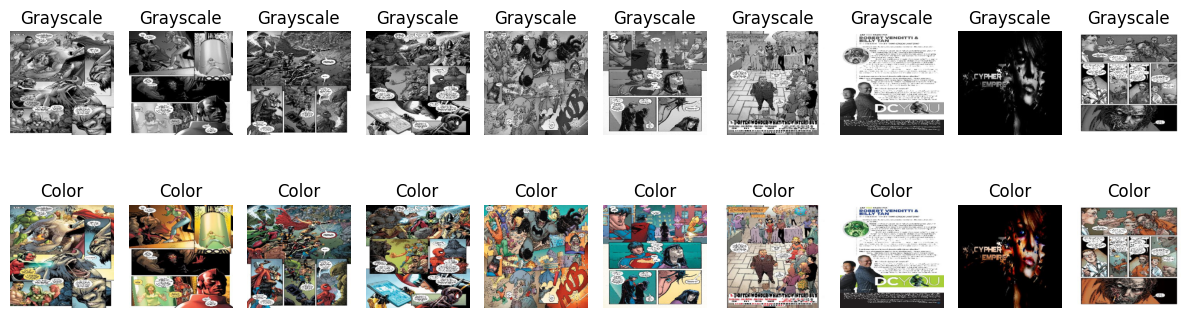

In [12]:
num_samples = 10
plt.figure(figsize=(12, 4))
for i in range(num_samples):
    plt.subplot(2, num_samples, i+1)
    plt.imshow(x[i].squeeze(), cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    plt.subplot(2, num_samples, i+1+num_samples)
    plt.imshow((y[i] * 0.5 + 0.5).clip(0, 1))
    plt.title("Color")
    plt.axis('off')
plt.tight_layout()
plt.show()

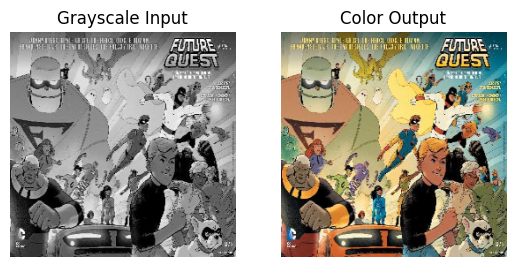

In [13]:
# Display from test 
plt.subplot(1, 2, 1)
plt.imshow(x_test[0].squeeze(), cmap='gray')
plt.title("Grayscale Input")
plt.axis('off')

plt.subplot(1, 2, 2)
rgb_img = (y_test[0] * 0.5 + 0.5).clip(0, 1)
plt.imshow(rgb_img)
plt.title("Color Output")
plt.axis('off')
plt.show()

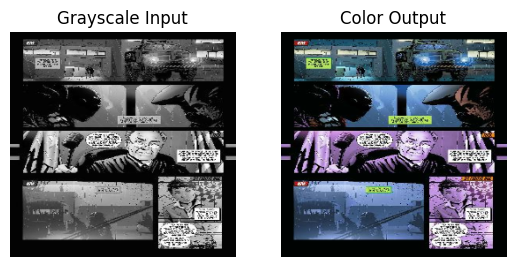

In [14]:
# Display from train
plt.subplot(1, 2, 1)
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.title("Grayscale Input")
plt.axis('off')

plt.subplot(1, 2, 2)
rgb_img = (y_train[0] * 0.5 + 0.5).clip(0, 1)
plt.imshow(rgb_img)
plt.title("Color Output")
plt.axis('off')
plt.show()
